**<h1 align="center">PROYECTO INDIVIDUAL 1</h1>**
<h1 align="center"> EDA (Exploratory Data Analysis)</h1>

In [16]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from wordcloud import WordCloud

In [17]:
# Cargamos el archivo parquet
df = pd.read_parquet('Merge\\Tabla_API.parquet')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           38304 non-null  object 
 1   item_id           38304 non-null  object 
 2   playtime_forever  38304 non-null  float64
 3   recommend         38304 non-null  bool   
 4   review            38304 non-null  int64  
 5   year_posted       38304 non-null  int64  
 6   genres            38304 non-null  object 
 7   title             38304 non-null  object 
 8   developer         38304 non-null  object 
 9   year              38304 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 2.7+ MB


In [4]:
df['recommend'] = df['recommend'].astype('int64')

In [5]:
df = df[['playtime_forever', 'recommend', 'review', 'year', 'year_posted']]
#Calcular el IQR para cada columna
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR for {column}:{IQR}')

#Definir los limites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Identificar los outliers
outliers = df[(df['playtime_forever'] < lower_bound) + (df['playtime_forever'] > upper_bound)]
print(f"Cantidad de Outliers: {len(outliers)}")
print(outliers)

IQR for playtime_forever:106.62083333333332
IQR for recommend:0.0
IQR for review:1.0
IQR for year:4.0
IQR for year_posted:2.0
Cantidad de Outliers: 38301
       playtime_forever  recommend  review  year  year_posted
0              4.516667          1       2  2009         2011
1            166.766667          1       2  2009         2011
2              9.183333          1       2  2013         2013
3              5.816667          1       2  2013         2013
4             53.750000          1       2  2011         2014
...                 ...        ...     ...   ...          ...
38299         66.150000          1       1  2012         2013
38300         16.833333          1       2  1998         2013
38301          3.683333          1       2  2001         2013
38302          8.883333          1       2  2013         2013
38303         36.400000          1       2  2015         2013

[38301 rows x 5 columns]


<p>Debido a que la cantidad de outliers son bastantes en comparacion con la cantidad una vez hecho el ETL, se procede a dejar el dataset sin ningun cambio, pero haciendo la acotación.</p>

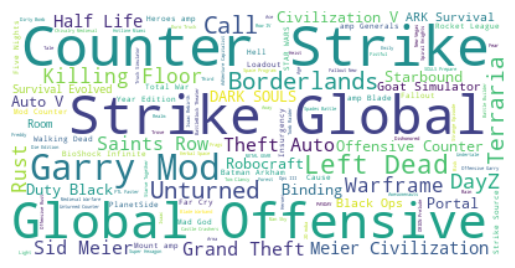

In [20]:
#Asumiendo que df_user_reviews es tu DataFrame y 'review' es la columna con las reseñas
text = " ".join(title for title in df['title'].dropna())
#Crear la nube de palabras
wordcloud = WordCloud(background_color="white").generate(text)
#Mostrar la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

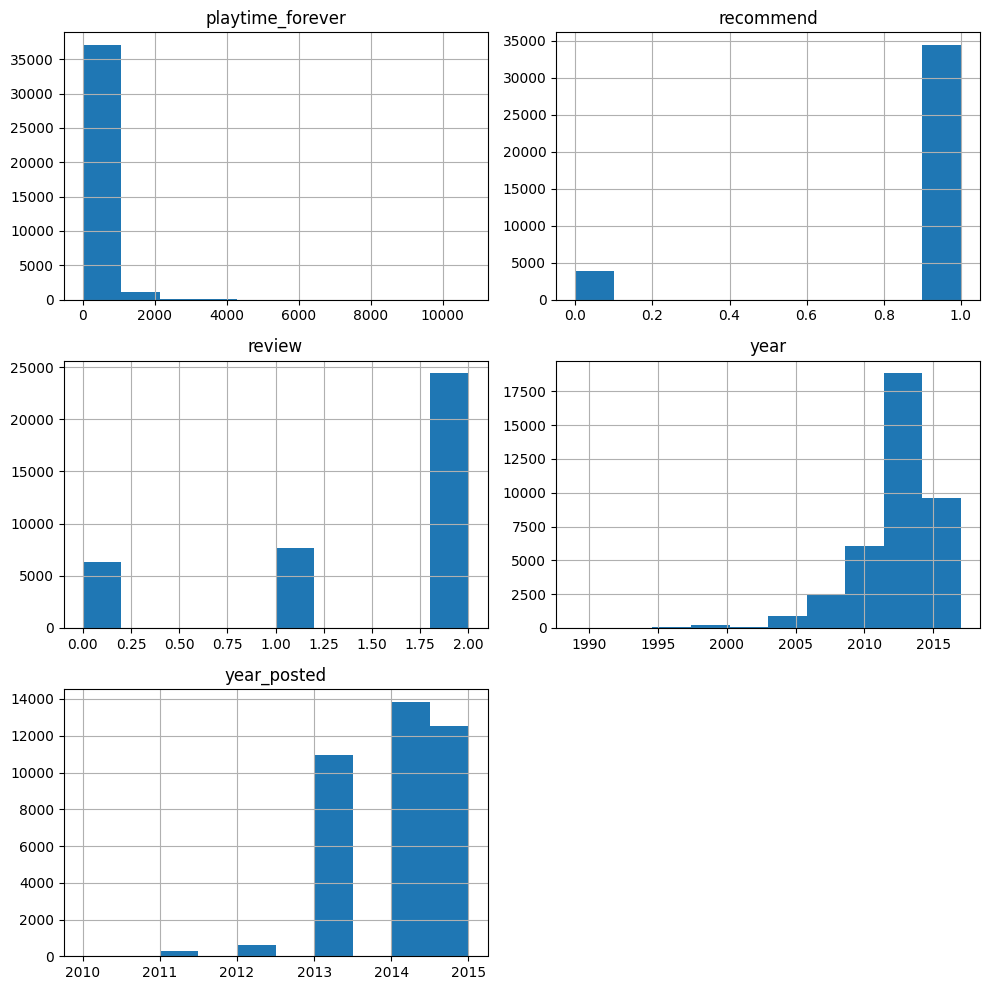

In [6]:
#Histograma de las variables numéricas
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<p>En las anteriores graficas podemos determinar primeramente que:</p>
<h3>Histogramas:</h3>
<p>Se observa la cantidad de veces que se presentan los valores de las columnas "year", "review", "year_posted".
En la primera gráfica vemos la distribucion del analisis de sentimiento llamada "review" donde se puede determinar que hay mayor cantidad de review positivos y neutros que negativos de los juegos.</p>
<p>En la segunda gráfica observamos la distribucion de los años donde se postearon reseñas sobre juegos determinados y en ella se denota que los años con más reseñas posteadas son 2013, 2014 y 2015.</p>
<p>En la tercera gráfica vemos la distribucion de los años de lanzamiento de juegos por parte de desarrolladores y se determina que los años con mayor cantidad de lanzamientos estan entre el 2012 y 2015.</p>

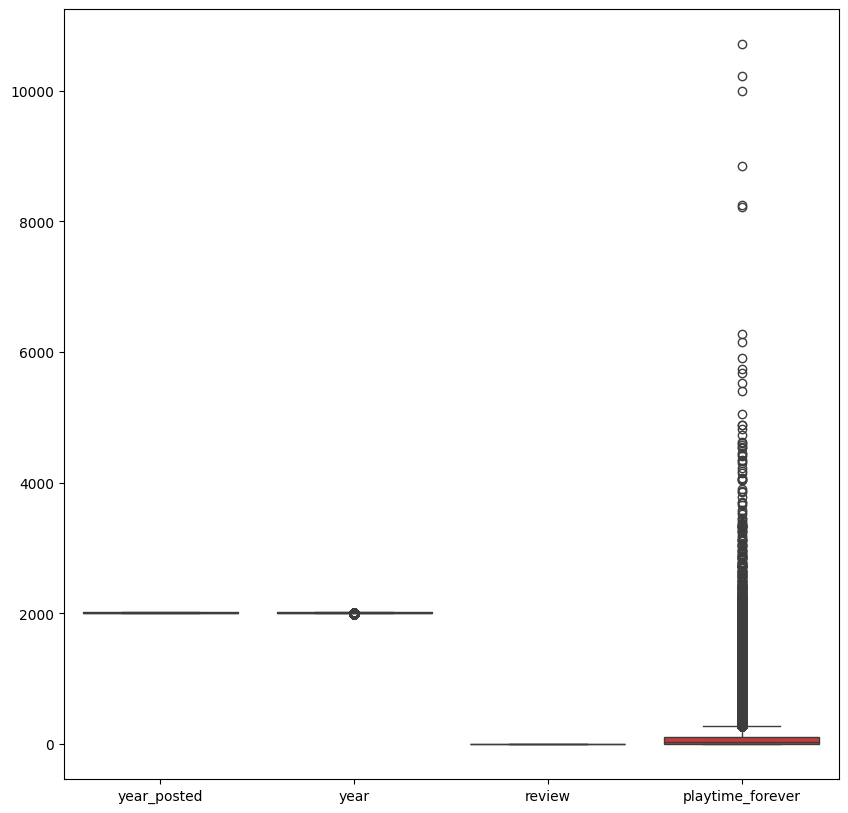

In [7]:
#Boxplot de las variables numéricas
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["year_posted", "year", "review", "playtime_forever"]])
plt.show()

<p>En la anterior gráfica se puede ver:</p>
<h2>Boxplot:</h2>
<p>La distribucion de los valores de los columnas "playtime_forever", "year_posted", "year" y "review" incluyendo la mediana (línea en el interior de la caja), los cuartiles (caja), los valores mínimos y máximos dentro del rango no considerado como atípico (líneas llamadas bigotes), y los puntos que se consideran valores atípicos fuera de este rango.</p>

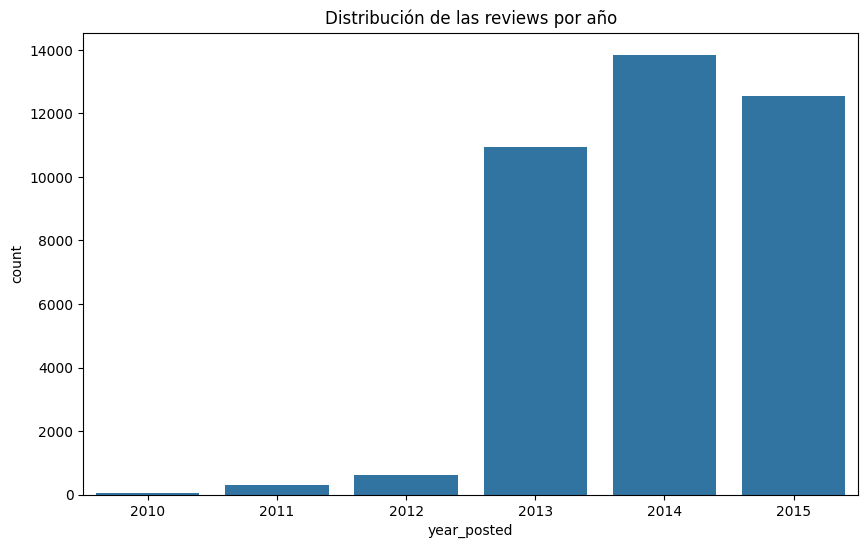

In [8]:
#Visualizar de la distribución de las reviews por año
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='year_posted')
plt.title('Distribución de las reviews por año')
plt.show()

<p>Se puede observar en la anterior gráfica que:</p>
<h2>Histograma:</h2>
<p>Los valores de las reseñas se distribuyen principalmente entre los años 2013, 2014 y 2015 lo que indica que en esos años tambien hubo la mayor cantidad de juegos lanzados por desarrolladores.</p>

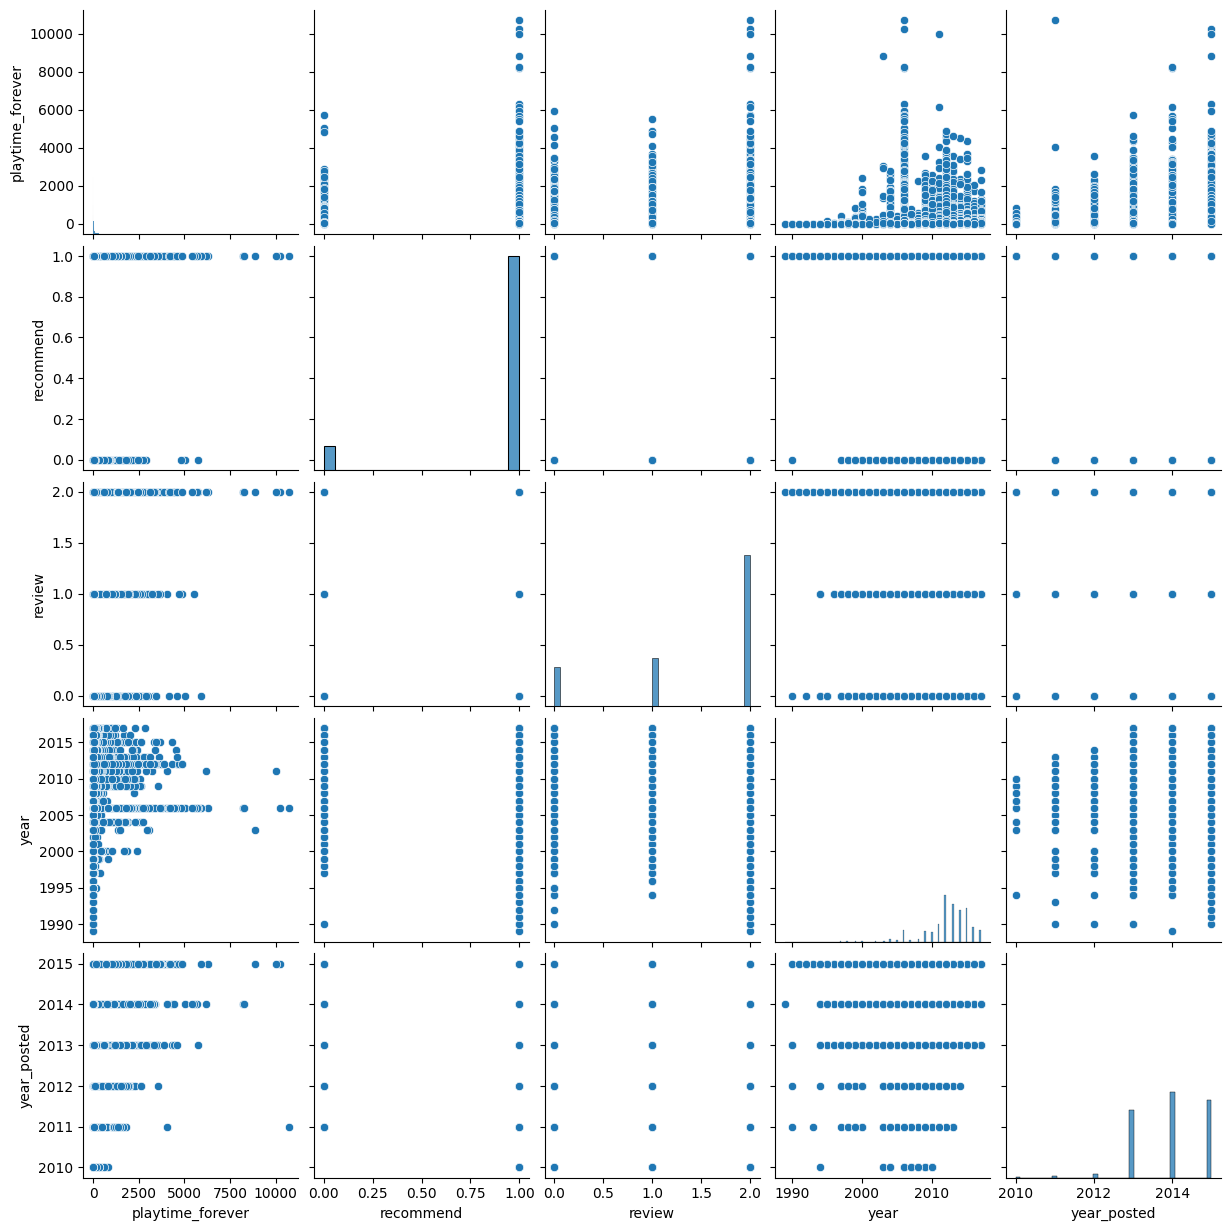

In [9]:
sns.pairplot(df)
plt.show()

<p>Este grafico muestra la relacion entre las columnas "playtime_forever", "recommend", "review", "year_posted" y "year"</p>
<p>Como se observa hay graficos de dispersion entre las columnas y en diagonal se ve grafico de columnas. En ellos se determina que los años con mas horas jugadas estan entre el año 2013, 2014 y 2015.</p>
<p>También se logra determinar que entre mayor sean las horas jugadas, mayor cantidad de review buenos se tendrán.</p>
<p>De igual manera se observa que la mayoria de juegos tienen "review" buenos.</p>

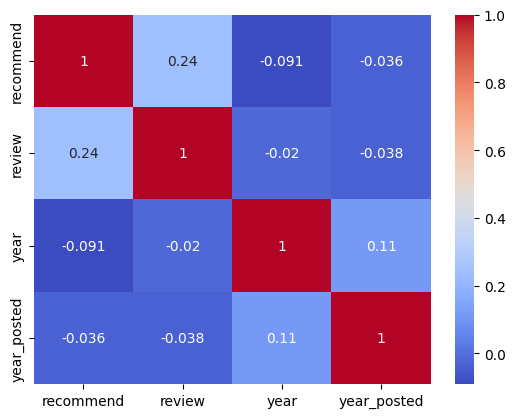

In [10]:
df_numeric = df.select_dtypes(include=['int64'])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<p>En este grafico podemos ver como es la correlacion a detalle entre las variables "year", "year_posted", "review" y "playtime_forever".
Se puede observar que las variables que mas se correlacionan estan "playtime_forever" y "review"; tambien "playtime_forever" y "year_posted".</p>